In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
filepath = "/home/buck_j/semesters/winter-2024/cs201/building-permits/building-permits-20240401.csv"
random_state = 1

In [106]:
# Import the following columns from the first 400000 rows of the dataset
raw_df = pd.read_csv(filepath, usecols=['PROCESSING_TIME', 'REVIEW_TYPE', 
                                        'PERMIT_TYPE', 'TOTAL_FEE', 'COMMUNITY_AREA', 
                                        'REPORTED_COST', 'CENSUS_TRACT', 'WARD',
                                        'XCOORDINATE', 'YCOORDINATE', 'ISSUE_DATE'], 
                     nrows=400000)
df = raw_df.dropna()
col_names = list(df.columns)

# Print some relevant information about the data
print(f"Number of Rows in Raw Data: {len(raw_df)}")
print(f"Number of Rows with Missing Data: {raw_df.isnull().any(axis=1).sum()}")
print(f"Length of Cleaned Dataframe: {len(df)}")
print()

col_names_strs = [col_names[i] for i in range(len(col_names))]
props_nan_rows = [f'{n*100:.4g}%' for n in np.array(raw_df.isnull().sum(axis=0).tolist()) / len(raw_df)]
col_dtype_strs = [str(df[col_names[i]].dtype) for i in range(len(df.columns))]
max_lengths = [max([len(item) for item in sublist]) 
               for sublist in zip(col_names_strs, props_nan_rows, col_dtype_strs)]

print(f"{'Col Name'.ljust(max(max_lengths))} {'% NaNs'.ljust(max(max_lengths))} {'Data Type'.ljust(max(max_lengths))}")
for item1, item2, item3 in zip(col_names_strs, props_nan_rows, col_dtype_strs):
    print(f"{item1.ljust(max(max_lengths))} {item2.ljust(max(max_lengths))} {item3.ljust(max(max_lengths))}")

del(raw_df)

Number of Rows in Raw Data: 400000
Number of Rows with Missing Data: 103371
Length of Cleaned Dataframe: 296629

Col Name        % NaNs          Data Type      
PERMIT_TYPE     0%              object         
REVIEW_TYPE     0.001%          object         
ISSUE_DATE      0%              object         
PROCESSING_TIME 0.113%          float64        
TOTAL_FEE       0%              float64        
REPORTED_COST   0.09325%        float64        
COMMUNITY_AREA  25.06%          float64        
CENSUS_TRACT    25.56%          float64        
WARD            25.08%          float64        
XCOORDINATE     0.359%          float64        
YCOORDINATE     0.359%          float64        


In [154]:
# Split into X and Y
X = df.drop("REPORTED_COST", axis=1)
Y = df["REPORTED_COST"]

# Convert ISSUE_DATE to numeric data
X["ISSUE_DATE"] = X["ISSUE_DATE"].str[-4:].astype(int)

In [155]:
# Get column names of categorical and numerical data
cat_rows, numeric_rows = [], []
for col in X.columns:
    if X[col].dtype == "float64" or X[col].dtype == "int":
        numeric_rows.append(col)
    else:
        cat_rows.append(col)

In [156]:
# Split X into categorical and numerical features
X_cat, X_num = X[cat_rows], X[numeric_rows]

In [157]:
# Normalize numeric data
X_num_normalized = pd.DataFrame()
for col in X_num.columns:
    # if X_num[col].dtype == "int":
    #     X_num_normalized[col] = X_num[col]
    X_num_normalized[col] = (X_num[col] - X_num[col].mean()) / X_num[col].std()
Y = (Y - Y.mean()) / Y.std()

In [158]:
# One hot encode categorical data
X_cat_encoded = OneHotEncoder().fit_transform(X_cat)

In [159]:
# Split data into train and test sets
X_train_cat, X_test_cat, X_train_num, X_test_num, Y_train, Y_test \
    = train_test_split(X_cat_encoded, X_num_normalized, Y, test_size=0.2, 
                       random_state=random_state)


In [160]:
# Convert non pandas structures to pd.DataFrame()
X_train_cat = pd.DataFrame.sparse.from_spmatrix(X_train_cat)
X_test_cat = pd.DataFrame.sparse.from_spmatrix(X_test_cat)

In [161]:
# Rejoin categorical and numerical data into a single feature matrix
X_train = pd.concat([X_train_cat, X_train_num.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test_cat, X_test_num.reset_index(drop=True)], axis=1)
del(X_num, X_cat, X_num_normalized, X_cat_encoded, X_train_num, X_train_cat, X_test_num, X_test_cat)
print(f"X_train Dimensions: {X_train.shape}")
print(f"X_test Dimensions: {X_test.shape}")

X_train Dimensions: (237303, 30)
X_test Dimensions: (59326, 30)


In [162]:
# Convert data to numpy arrays
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
Y_train_np = np.array(Y_train)
Y_test_np = np.array(Y_test)

In [164]:
# Initialize MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes=(3, 100), 
                         max_iter=5000, 
                         verbose=2,
                         shuffle = True,
                         alpha=0.0005, 
                         warm_start=True,

                         solver = "sgd", momentum = 0.95,
                         
                         early_stopping=True, n_iter_no_change=100, validation_fraction=0.1,

                         learning_rate = "adaptive", 
                         random_state=random_state)

In [165]:
# Fit the MLPRegressor to the training data
regressor.fit(X_train_np, Y_train_np)

Iteration 1, loss = 0.40127576
Validation score: -0.020258
Iteration 2, loss = 0.39983992
Validation score: 0.014109
Iteration 3, loss = 0.39982188
Validation score: -0.020604
Iteration 4, loss = 0.40003449
Validation score: 0.023926
Iteration 5, loss = 0.39960365
Validation score: 0.030108
Iteration 6, loss = 0.39974712
Validation score: 0.032114
Iteration 7, loss = 0.39948890
Validation score: -0.001943
Iteration 8, loss = 0.40020412
Validation score: 0.024916
Iteration 9, loss = 0.39963705
Validation score: 0.027193
Iteration 10, loss = 0.39958817
Validation score: -0.267126
Iteration 11, loss = 0.39971349
Validation score: 0.016604
Iteration 12, loss = 0.39957801
Validation score: 0.049868
Iteration 13, loss = 0.39963692
Validation score: 0.039453
Iteration 14, loss = 0.39955268
Validation score: 0.006838
Iteration 15, loss = 0.39931884
Validation score: 0.065297
Iteration 16, loss = 0.39937303
Validation score: 0.071233
Iteration 17, loss = 0.39987853
Validation score: 0.045802
It

MLPRegressor(alpha=0.0005, early_stopping=True, hidden_layer_sizes=(3, 100),
             learning_rate='adaptive', max_iter=5000, momentum=0.95,
             n_iter_no_change=100, random_state=1, solver='sgd', verbose=2,
             warm_start=True)

In [173]:
# Report test and train scores of regressor
print(f"Test Score: {regressor.score(X_test_np, Y_test_np)}")
print(f"Train Score: {regressor.score(X_train_np, Y_train_np)}")

Test Score: 0.0003039769326124153
Train Score: 0.004477412726103025


Text(0, 0.5, 'Loss')

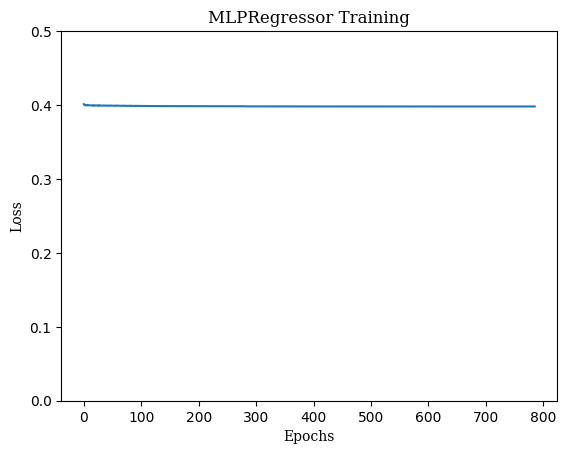

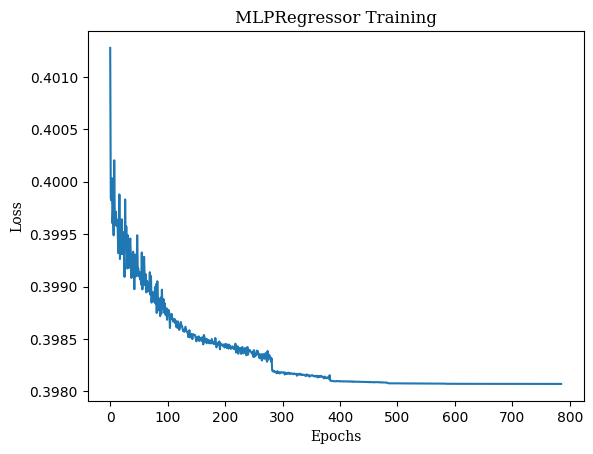

In [178]:
# Plot loss of regressor over epochs
plt.figure(1)
plt.plot(regressor.loss_curve_)
plt.title("MLPRegressor Training", fontdict={"family":"serif"})
plt.xlabel("Epochs", fontdict={"family":"serif"})
plt.ylabel("Loss", fontdict={"family":"serif"})
plt.ylim([0, 0.5])

plt.figure(2)
plt.plot(regressor.loss_curve_)
plt.title("MLPRegressor Training", fontdict={"family":"serif"})
plt.xlabel("Epochs", fontdict={"family":"serif"})
plt.ylabel("Loss", fontdict={"family":"serif"})

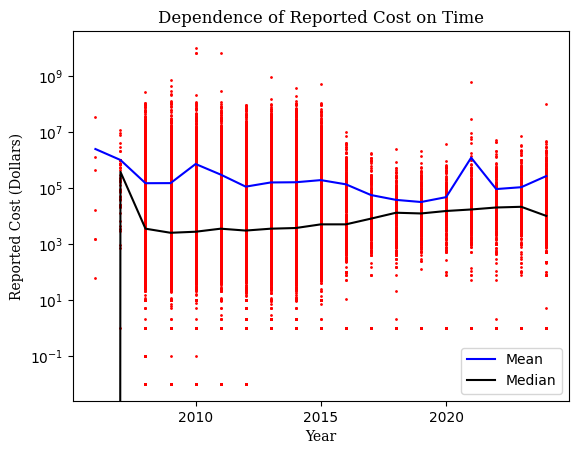

In [225]:
# Plot reported cost over time as a scatter plot, and as average (or median) for each year
df["grouping_key"] = df['ISSUE_DATE'].str[-4:].astype(int)
mean_per_year = df.groupby("grouping_key")["REPORTED_COST"].mean()
median_per_year = df.groupby("grouping_key")["REPORTED_COST"].median()
plt.scatter(df["ISSUE_DATE"].str[-4:].astype(int), df["REPORTED_COST"], color="r", s=1)
plt.plot(mean_per_year.index, mean_per_year, "blue", label="Mean")
plt.plot(median_per_year.index, median_per_year, "black", label="Median")
plt.legend()
plt.title("Dependence of Reported Cost on Time", fontdict={"family":"serif"})
plt.locator_params(axis='x', integer=True)
plt.xlabel("Year", fontdict={"family":"serif"})
plt.ylabel("Reported Cost (Dollars)", fontdict={"family":"serif"})
plt.yscale("log")